In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import glob

In [4]:
data = []
list = [pd.read_json(filename, lines=True) for filename in glob.glob("../week4/data/return-data/*.txt")]
df = pd.concat(list, axis=0)
df.head()

,basket,returnLabel,totalAmount,transactionId,zipCode
0,"[3, 1]",0,106,3520406327,7667
1,[1],0,50,6030070379,7647
2,"[1, 1, 5, 4, 1]",0,175,6579182382,2633
3,"[1, 2, 0, 1]",0,272,2779338441,4309
4,[2],0,14,3198368336,4659


In [5]:
df.drop(['transactionId','zipCode'],axis=1,inplace=True)
df.head()

,basket,returnLabel,totalAmount
0,"[3, 1]",0,106
1,[1],0,50
2,"[1, 1, 5, 4, 1]",0,175
3,"[1, 2, 0, 1]",0,272
4,[2],0,14


In [6]:
def categories(c, value):
    return c.count(value)

df['c_0'] = df['basket'].apply(lambda x: categories(x, 0))
df['c_1'] = df['basket'].apply(lambda x: categories(x, 1))
df['c_2'] = df['basket'].apply(lambda x: categories(x, 2))
df['c_3'] = df['basket'].apply(lambda x: categories(x, 3))
df['c_4'] = df['basket'].apply(lambda x: categories(x, 4))
df['c_5'] = df['basket'].apply(lambda x: categories(x, 5))

df.drop(['basket'],axis=1,inplace=True)

df.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5
0,0,106,0,1,0,1,0,0
1,0,50,0,1,0,0,0,0
2,0,175,0,3,0,0,1,1
3,0,272,1,2,1,0,0,0
4,0,14,0,0,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['returnLabel'],axis=1)
y = df['returnLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
logmodelpredictions = logmodel.predict_proba(X_test)

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
forestpredictions = forest.predict_proba(X_test)

## ROC curve

### Logistic Regression

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, logmodelpredictions[:, 1])

In [13]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99514531, 0.99527831,
       1.        ])

In [14]:
tpr

array([0.        , 0.00215983, 0.07991361, ..., 1.        , 1.        ,
       1.        ])

In [15]:
thresholds

array([1.99840318e+00, 9.98403176e-01, 8.80900442e-01, ...,
       6.49952710e-10, 6.44950908e-10, 3.75548711e-12])

In [16]:
roc_auc = auc(fpr, tpr)
roc_auc

0.936785015967094

### Random Forest

In [17]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, forestpredictions[:, 1])

In [18]:
fpr2

array([0.00000000e+00, 1.33005254e-04, 1.99507881e-04, 1.26354991e-03,
       1.46305779e-03, 3.19212609e-03, 3.19212609e-03, 3.32513134e-03,
       3.85715236e-03, 3.92365498e-03, 3.92365498e-03, 6.51725743e-03,
       6.71676531e-03, 6.84977057e-03, 9.37687039e-03, 9.64288089e-03,
       9.70938352e-03, 9.84238877e-03, 1.01749019e-02, 1.01749019e-02,
       1.03079072e-02, 1.05739177e-02, 1.07069229e-02, 1.44310700e-02,
       1.44975727e-02, 1.45640753e-02, 1.47635832e-02, 1.49630910e-02,
       1.50295937e-02, 1.54286094e-02, 1.54951121e-02, 1.57611226e-02,
       1.58276252e-02, 1.59606304e-02, 1.60271331e-02, 2.02833012e-02,
       2.02833012e-02, 2.04163064e-02, 2.06823170e-02, 2.09483275e-02,
       2.11478353e-02, 2.12143380e-02, 2.16133537e-02, 2.16133537e-02,
       2.17463590e-02, 2.19458669e-02, 2.21453747e-02, 2.22783800e-02,
       2.24778879e-02, 2.27438984e-02, 2.95936689e-02, 2.98596795e-02,
       2.99926847e-02, 3.05247057e-02, 3.05912084e-02, 3.08572189e-02,
      

In [19]:
tpr2

array([0.        , 0.02591793, 0.02591793, 0.06263499, 0.06263499,
       0.11447084, 0.11663067, 0.11663067, 0.11663067, 0.11663067,
       0.1187905 , 0.18142549, 0.18142549, 0.18358531, 0.23974082,
       0.23974082, 0.23974082, 0.23974082, 0.23974082, 0.24190065,
       0.24190065, 0.24190065, 0.24190065, 0.28509719, 0.28509719,
       0.28941685, 0.28941685, 0.28941685, 0.2937365 , 0.2937365 ,
       0.29589633, 0.29589633, 0.29589633, 0.29589633, 0.29589633,
       0.34341253, 0.34557235, 0.34557235, 0.34557235, 0.34557235,
       0.34773218, 0.34773218, 0.34773218, 0.34989201, 0.34989201,
       0.34989201, 0.34989201, 0.35421166, 0.35421166, 0.35421166,
       0.41036717, 0.41036717, 0.412527  , 0.412527  , 0.412527  ,
       0.412527  , 0.412527  , 0.412527  , 0.412527  , 0.412527  ,
       0.41468683, 0.41684665, 0.41684665, 0.42116631, 0.42332613,
       0.42332613, 0.42332613, 0.42332613, 0.42332613, 0.42332613,
       0.42332613, 0.50323974, 0.50323974, 0.5075594 , 0.50755

In [20]:
thresholds2

array([2.        , 1.        , 0.96666667, 0.9       , 0.825     ,
       0.8       , 0.775     , 0.76666667, 0.74166667, 0.725     ,
       0.71666667, 0.7       , 0.65      , 0.60833333, 0.6       ,
       0.56666667, 0.56547619, 0.55833333, 0.55      , 0.54166667,
       0.53333333, 0.525     , 0.505     , 0.5       , 0.49666667,
       0.48055556, 0.46666667, 0.45714286, 0.45      , 0.44333333,
       0.44166667, 0.43690476, 0.43333333, 0.43333333, 0.40833333,
       0.4       , 0.38      , 0.375     , 0.37357143, 0.36666667,
       0.36619048, 0.36166667, 0.35342033, 0.35      , 0.34166667,
       0.33333333, 0.325     , 0.31380952, 0.30964286, 0.3075    ,
       0.3       , 0.28      , 0.275     , 0.27101954, 0.26357143,
       0.26061688, 0.26      , 0.25833333, 0.25666667, 0.25666667,
       0.24619048, 0.245     , 0.23333333, 0.23333333, 0.22888889,
       0.22611111, 0.21666667, 0.2125    , 0.20811688, 0.20547619,
       0.20333333, 0.2       , 0.19857143, 0.195     , 0.18956

In [21]:
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.7769242635624064

### Plot

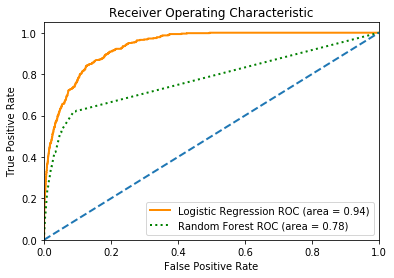

In [22]:
plt.figure()
lw = 2
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression ROC (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, linestyle=':', label='Random Forest ROC (area = %0.2f)' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()